# **Plotting the 2D gaussian distribution**

We are given a **2D Gaussian distribution** with:
- **Mean**: $$\mu = [-5, 5]$$
- **Covariance Matrix**: $$\Sigma = 5I = \begin{bmatrix} 5 & 0 \\ 0 & 5 \end{bmatrix}$$
 
The probability density function (PDF) is:
$$
p(x) = \frac{1}{2\pi \sqrt{|\Sigma|}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right)
$$
where $$|\Sigma| = 25\:, \quad \Sigma^{-1} = \frac{1}{5} I$$


For a point x = [x_1, x_2]:
$$
(x - \mu)^T \Sigma^{-1} (x - \mu) =
\begin{bmatrix} x_1 + 5 & x_2 - 5 \end{bmatrix}
\begin{bmatrix} 0.2 & 0 \\ 0 & 0.2 \end{bmatrix}
\begin{bmatrix} x_1 + 5 \\ x_2 - 5 \end{bmatrix}
= 0.2 (x_1 + 5)^2 + 0.2 (x_2 - 5)^2
$$

Thus, substituting this into the PDF formula:  
$$
p(x) = \frac{1}{10\pi} \exp \left( -0.1 \left[ (x_1 + 5)^2 + (x_2 - 5)^2 \right] \right).
$$

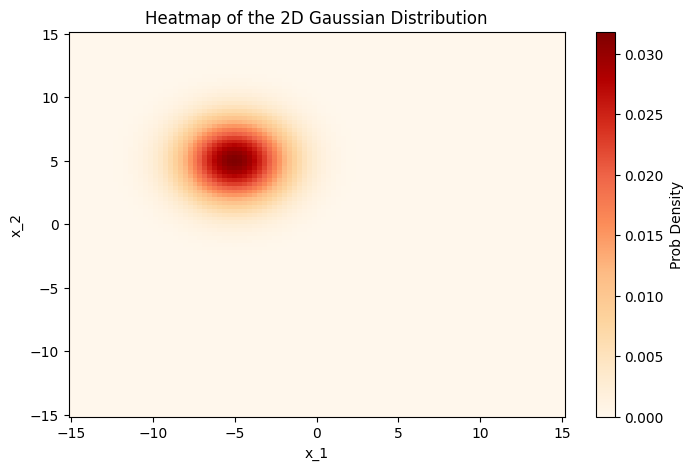

In [23]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian_pdf(x1, x2):
    mu = np.array([-5, 5]) 
    norm_const = 1 / (10 * np.pi)
    diff_x1 = x1 - mu[0]  
    diff_x2 = x2 - mu[1]
    exponent = -0.1 * (diff_x1**2 + diff_x2**2)
    
    return norm_const * np.exp(exponent)


def plot_gaussian_heatmap():
    x = np.linspace(-15, 15, 100)
    y = np.linspace(-15, 15, 100)
    y, x = np.meshgrid(y, x)

    z = gaussian_pdf(x, y)

    fig, ax = plt.subplots(figsize=(8, 5))
    c = ax.pcolormesh(x, y, z, cmap='OrRd')
    ax.set_title('Heatmap of the 2D Gaussian Distribution')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    fig.colorbar(c, ax=ax, label='Prob Density')
    
    plt.show()

plot_gaussian_heatmap()

# **Score Function Calculation**

The **score function** is the gradient of the log probability density function (PDF):
$$
S_\theta(x) = \nabla_x \log p(x)
$$

Taking the natural logarithm of p(x):
$$
\log p(x) = -\log(2\pi \sqrt{|\Sigma|}) - \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)
$$

Since the first term is a constant, its gradient is **zero**. To differentiate:
$$
\nabla_x \log p(x) = -\frac{1}{2} \nabla_x \left( (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$

Using the gradient identity for a quadratic form:
$$
\nabla_x (z^T A z) = 2 A z
$$

where $$ z = x - \mu\:,  \;\;  A = \frac{1}{2} \Sigma^{-1} $$ we get:
$$
\nabla_x \log p(x) = -\Sigma^{-1} (x - \mu)
$$

Substituting the values:
$$
S_\theta(x) = -\begin{bmatrix} 0.2 & 0 \\ 0 & 0.2 \end{bmatrix} \begin{bmatrix} x_1 + 5 \\ x_2 - 5 \end{bmatrix}
= \begin{bmatrix} -0.2 (x_1 + 5) \\ -0.2 (x_2 - 5) \end{bmatrix}
$$

# **Langevin Dynamics for Sampling**

To sample from this distribution, **Langevin Dynamics** follows the update rule:
$$
X^{t+1} = X^t + \epsilon S_\theta(X^t) + \sqrt{2\epsilon} Z^t
$$

# **Comparing Samples from Different Methods**